## Linear Regression with symbol

This sample constructs a simple linear regression model with symbol.

To caculate the weights and bias of the following formula:

x1*weight1 + x2*weight2 + bias = y

In [2]:
import mxnet as mx
import numpy as np

#### Generate sample data

In [3]:
b = 4
w1 = 3
w2 = 5

sample_number = 100

x1 = np.random.rand(sample_number)
x2 = np.random.rand(sample_number)
noise = np.random.rand(sample_number)

x0_array = mx.nd.ones((sample_number,))
x1_array = mx.nd.array(x1)-0.5
x2_array = mx.nd.array(x2)-0.5
noise_array = mx.nd.array(noise)-0.5

x_data = mx.nd.concat(x0_array, x1_array, x2_array, dim=0).reshape((3,sample_number)).T
y_data = x1_array*w1 + x2_array*w2 + b + noise_array*0.01

x_data[0:3].asnumpy()

array([[ 1.        ,  0.12912387, -0.40222883],
       [ 1.        ,  0.18982613, -0.47551966],
       [ 1.        , -0.10729256,  0.04395002]], dtype=float32)

#### Construct the model

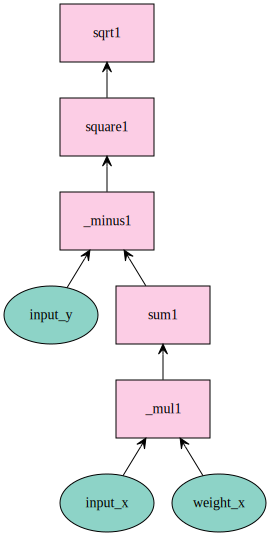

In [5]:

input_x = mx.sym.Variable("input_x")
weight_x = mx.sym.Variable("weight_x")

input_y = mx.sym.Variable("input_y")

multiple_result = input_x * weight_x

sum_result = mx.sym.sum(multiple_result)

lost = mx.sym.sqrt(mx.sym.square(input_y - sum_result))

group = mx.sym.Group([multiple_result, lost])

mx.viz.plot_network(symbol = group)

In [11]:
lost.list_outputs()

['sqrt1_output']

#### Create the init weights

weight_x_para is the placeholder of weights and bias

weight_x_g is used to store gradience 

In [12]:
weight_x_para = mx.nd.empty((3,))

weight_x_g = mx.nd.zeros((3,))



#### Train the model

With for loop, we can call the forward and backward function again and again, to caculate the gradience of weights and then udpate the weights

In [14]:

for i in range(0,sample_number-1):
    exe = lost.bind(mx.cpu(), {"input_x":x_data[i],"weight_x":weight_x_para, "input_y":y_data[i]}, \
                args_grad = {'weight_x':weight_x_g})
    result = exe.forward(is_train=True)

    lost_value = result[0].asscalar()
    #multiple_output = result[0]
    
    print "lost is",
    print lost_value
    
#     print "multiple_output is",
#     print multiple_output.asnumpy()
        
    exe.backward(result[0])
    
    weight_x_para = weight_x_para - weight_x_g
   
print "weight is: [b, w1, w2]"
print weight_x_para.asnumpy()



lost is 2.3778
lost is 0.696226
lost is 2.26373
lost is 1.42821
lost is 1.48057
lost is 0.613703
lost is 0.0425341
lost is 0.196822
lost is 0.156387
lost is 2.28608
lost is 1.20722
lost is 3.86175
lost is 4.002
lost is 0.614595
lost is 0.444793
lost is 0.0897655
lost is 1.21413
lost is 0.0264351
lost is 0.676244
lost is 0.410774
lost is 0.242741
lost is 0.298951
lost is 0.557405
lost is 0.244728
lost is 0.0384817
lost is 0.803891
lost is 1.06279
lost is 0.223861
lost is 0.167216
lost is 0.661471
lost is 0.64825
lost is 0.276807
lost is 0.193422
lost is 0.104652
lost is 0.582864
lost is 0.823187
lost is 0.144744
lost is 0.435569
lost is 0.448118
lost is 0.118796
lost is 0.131802
lost is 0.0318673
lost is 0.20466
lost is 0.347644
lost is 0.217137
lost is 0.048667
lost is 0.149862
lost is 0.0429482
lost is 0.188709
lost is 0.0641465
lost is 0.173256
lost is 0.256539
lost is 0.106148
lost is 0.0280688
lost is 0.023549
lost is 0.0689301
lost is 0.0232229
lost is 0.0963469
lost is 0.0728192


In [16]:
exe.outputs


[<NDArray 1 @cpu(0)>]